In [1]:
import pandas as pd
from glob import glob
import os
import matplotlib.pyplot as plt

# Merge monthly sales data into single file

In [2]:
jan = pd.read_csv('./Sales_Data/Sales_January_2019.csv')

#Reading all files 
#sales19 = glob('Sales_Data/*.csv')
files = [file for file in os.listdir('./Sales_Data')]  
all_files = pd.DataFrame()

#Merging all files into one file
#df_sales19 = pd.concat([pd.read_csv(f, delimiter=',') for f in sales19])
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_files = pd.concat([all_files, df])

all_files.to_csv('allfiles.csv', index=False)    

## Read updated DataFrame

In [3]:
allfiles = pd.read_csv('allfiles.csv')
allfiles.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Process Clean Up

In [4]:
#Check for NaN Values
nan_df = allfiles[allfiles.isna().any(axis=1)]
nan_df.head()

#Drop NaNRows
allfiles = allfiles.dropna(how='all')

#Fix the "OR" error upon converting orderdate into Month
allfiles = allfiles[allfiles['Order Date'].str[0:2] !='Or']

#COnvert column values to correct type
allfiles['Quantity Ordered'] = pd.to_numeric(allfiles['Quantity Ordered'])
allfiles['Price Each'] = pd.to_numeric(allfiles['Price Each'])


# Add Extra Columns

In [5]:
#Add Month Column
allfiles['Month'] =allfiles['Order Date'].str[0:2]
allfiles['Month'] =allfiles['Month'].astype('int32')

#Add Sales($$$) Column
allfiles['Sales'] = allfiles['Quantity Ordered'].astype('int') * allfiles['Price Each'].astype('float')
allfiles.head()

#Add City Column
#Use apply() method
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

allfiles['City'] = allfiles['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
allfiles.head()

#Convert order date to object: manipulating as it is, str, may cause errors later for tracking purposes
#Add hour column
allfiles['Hour'] = pd.to_datetime(allfiles['Order Date']).dt.hour
allfiles['Minute'] = pd.to_datetime(allfiles['Order Date']).dt.minute
allfiles['Count'] = 1
allfiles.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,1


# What was the best month for sales? How much was earned that month?

In [6]:
sales_results = allfiles.groupby('Month').sum()

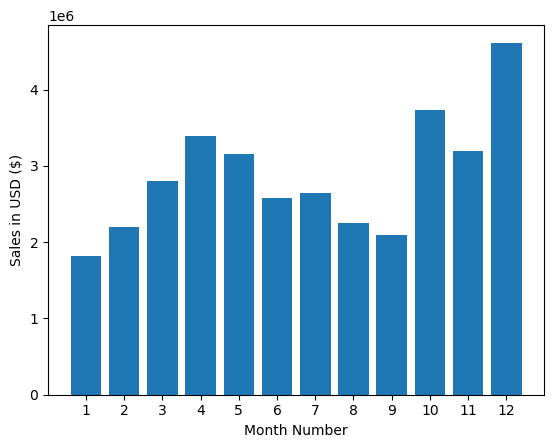

In [7]:
#Plot the results
months = range(1,13)

plt.bar(months,allfiles.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()


# What city made the most Sales?

In [8]:
prod_result = allfiles.groupby('City').sum()

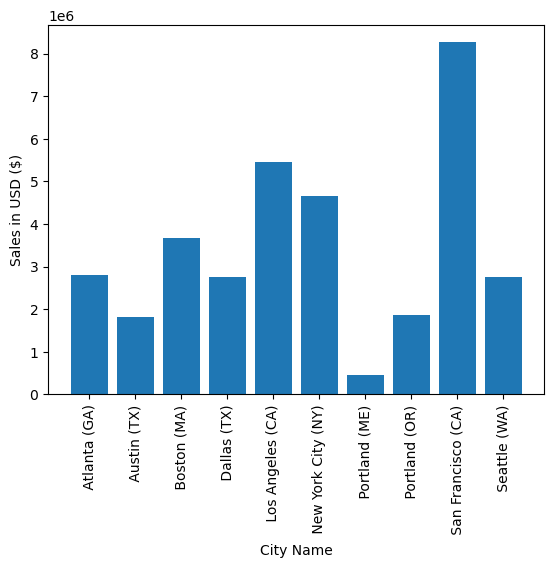

In [9]:
#plot the results
# Match Sales and Sales by City, using list comprehension
cities = [city for city, df in allfiles.groupby(['City'])]

plt.bar(cities, prod_result['Sales'])
plt.xticks(cities, rotation='vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

## What time should we display advertisemens to maximize the likelihood of customer’s buying product?

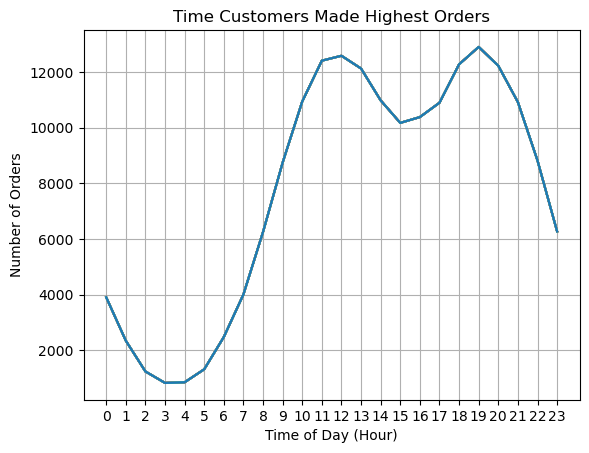

In [10]:
hours = [hour for hour, df in allfiles.groupby(['Hour'])]

plt.plot(hours, allfiles.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.title('Time Customers Made Highest Orders')
plt.ylabel('Number of Orders')
plt.xlabel('Time of Day (Hour)')
plt.show()

## What products are most often sold together?

In [11]:
allfiles.head(100)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,295751,AAA Batteries (4-pack),1,2.99,12/29/19 11:03,"922 Hickory St, Los Angeles, CA 90001",12,2.99,Los Angeles (CA),11,3,1
96,295752,Google Phone,1,600.00,12/11/19 12:29,"341 Forest St, Dallas, TX 75001",12,600.00,Dallas (TX),12,29,1
97,295753,34in Ultrawide Monitor,1,379.99,12/25/19 06:26,"365 Washington St, Dallas, TX 75001",12,379.99,Dallas (TX),6,26,1
98,295753,Lightning Charging Cable,1,14.95,12/25/19 06:26,"365 Washington St, Dallas, TX 75001",12,14.95,Dallas (TX),6,26,1


In [12]:
alldup = allfiles[allfiles['Order ID'].duplicated(keep=False)]
alldup.head()

alldup['Grouped'] = alldup.groupby(['Order ID'])['Product']. transform(lambda x: ','.join(x))
alldup.head(10)

alldup = alldup[['Order ID', 'Grouped']].drop_duplicates()
alldup.head(10)


<ipython-input-12-31eb4cef9803>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldup['Grouped'] = alldup.groupby(['Order ID'])['Product']. transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
80,295737,"iPhone,Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor,Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones,Wired Headphones"
129,295783,"Vareebadd Phone,USB-C Charging Cable"
133,295786,"USB-C Charging Cable,Apple Airpods Headphones"


In [13]:
#Create a list of sublists that pairs grouped combinations
#Assign a counter to check frequency of similar sublists
from itertools import combinations
from collections import Counter

count = Counter()

#split grouped combinations in pairs & then update count
for row in alldup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
#count.most_common(15)
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# What product sold the most? Why do you think it sold the most?

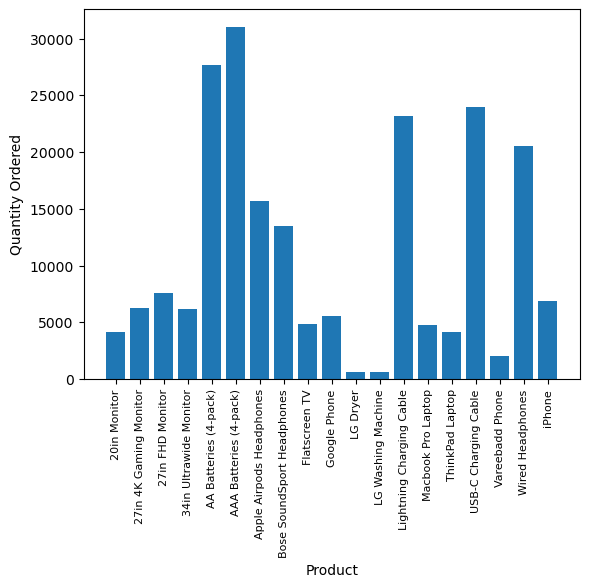

In [23]:
grouped_product = allfiles.groupby(['Product'])
quantity_ordered = grouped_product.sum()['Quantity Ordered']

products = [product for product, df in grouped_product]

plt.bar(keys, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-25-bdecf5b050c3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


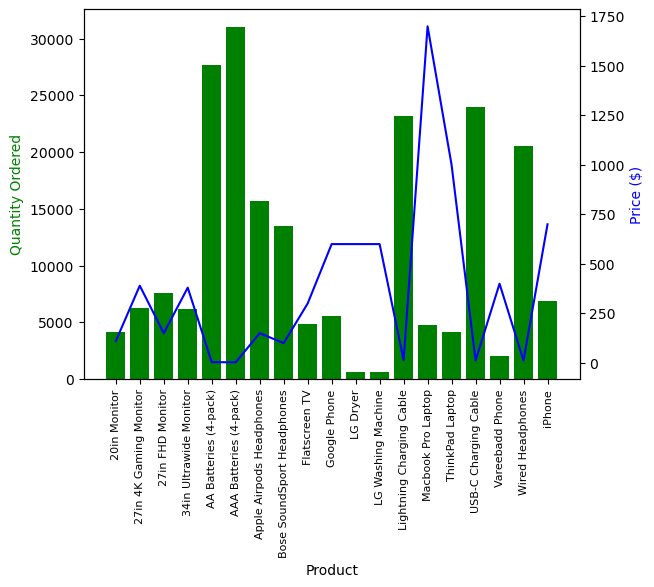

In [25]:
prices = allfiles.groupby('Product').mean()['Price Each']

#overlaying a 2nd y plot on products sold graph 
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

plt.show()